In [1]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
import h5py

In [3]:
from scipy.stats import norm

In [314]:
rs=np.arange(143,191) #100% DMSO
# rs=np.arange(119,141) #100% DMSO

In [315]:
#Load arrays

I_arrays=[]
delay_arrays=[]
d1_arrays=[]

for i in rs:
    try:
        hf=h5py.File(f'../shared/jungfrau_Iq/run{i}_Iq.h5')
        I_array =  xr.DataArray(hf['Iq'][:]).rename({'dim_0':'shot','dim_1':'q'})
        I_array=I_array.assign_coords({'q':hf['common_q'][:],'shot':I_array.shot})
        delay_array = xr.DataArray(hf['delay_ps'][:]).rename({'dim_0':'shot'})
        hf.close()
        
#         hf=h5py.File(f'../../hdf5/smalldata/xppl1001021_Run{i:04}.h5')
# #         h5py.File(f'../../hdf5/smalldata/xppl1001021_Run{i:04}.h5')
#         d1=xr.DataArray(hf['ipm2/sum'][:]).rename({'dim_0':'shot'})
#         hf.close()
        
        I_arrays.append(I_array)
        delay_arrays.append(delay_array)
#         d1_arrays.append(d1)
        print('added',i)
    except:
        print('Skipped',i)
#         pass

Skipped 143
Skipped 144
Skipped 145
Skipped 146
Skipped 147
Skipped 148
Skipped 149
Skipped 150
Skipped 151
Skipped 152
Skipped 153
Skipped 154
Skipped 155
Skipped 156
Skipped 157
Skipped 158
Skipped 159
Skipped 160
Skipped 161
Skipped 162
Skipped 163
Skipped 164
Skipped 165
Skipped 166
Skipped 167
Skipped 168
Skipped 169
Skipped 170
Skipped 171
Skipped 172
Skipped 173
Skipped 174
Skipped 175
Skipped 176
Skipped 177
Skipped 178
Skipped 179
Skipped 180
Skipped 181
Skipped 182
Skipped 183
Skipped 184
Skipped 185
Skipped 186
added 187
added 188
added 189
added 190


In [316]:
# concatenate along unique shots

Iarr=xr.concat(I_arrays,dim='shot')
delarr=xr.concat(delay_arrays,dim='shot')
# d1arr=xr.concat(d1_arrays,dim='shot')

In [317]:
#dataset with I's and delays
ds=xr.Dataset({'I':Iarr,'delay':delarr})#,'d1':d1arr})

In [318]:
ds

<xarray.Dataset>
Dimensions:  (q: 1024, shot: 76914)
Coordinates:
  * q        (q) float64 1.202 1.205 1.209 1.212 ... 4.769 4.772 4.776 4.779
  * shot     (shot) int64 0 1 2 3 4 5 6 ... 16899 16900 16901 16902 16903 16904
Data variables:
    I        (shot, q) float32 0.1179 0.176 0.09213 ... -0.1809 -0.1266 0.2342
    delay    (shot) float64 2.761 2.761 2.761 2.761 ... 0.2254 0.2254 0.2254

In [319]:
#total scattering intensity
tot=(ds.I*ds.q**2).sel(q=slice(3.5,5)).integrate(coord='q')

In [320]:
#add to dataset 
ds=ds.assign({'tot_scat':tot})

In [321]:
#Pick intensity source
# intsrc='d1'
intsrc='tot_scat'

(array([4.0677e+04, 1.0205e+04, 5.4340e+03, 3.7960e+03, 3.2580e+03,
        2.6260e+03, 2.1340e+03, 1.7230e+03, 1.4220e+03, 1.1610e+03,
        9.6700e+02, 7.0100e+02, 6.3800e+02, 5.1100e+02, 3.5000e+02,
        3.1800e+02, 2.1900e+02, 1.7500e+02, 1.4100e+02, 1.1100e+02,
        8.2000e+01, 5.6000e+01, 4.4000e+01, 5.1000e+01, 2.9000e+01,
        1.7000e+01, 1.8000e+01, 1.0000e+01, 5.0000e+00, 8.0000e+00,
        7.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

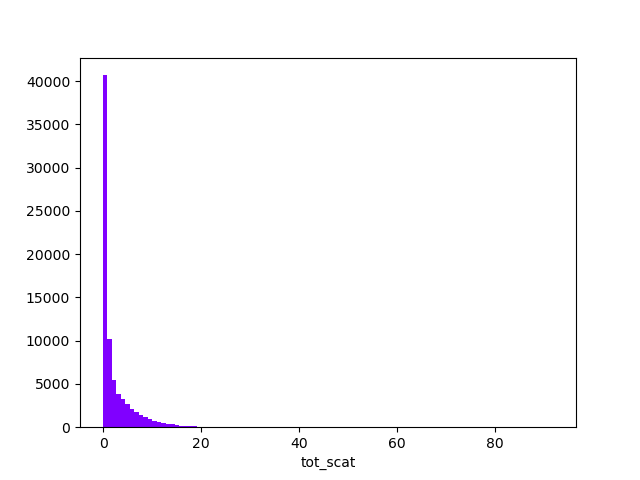

In [322]:
#plot total scattering histogram
plt.figure()
# ds.tot_scat.plot.hist(bins=100)
ds[intsrc].plot.hist(bins=100)

In [323]:
# quant=1-1e-1
thrsh=10#ds.tot_scat.quantile(quant,dim='shot')

In [338]:
#drop shots under threshold
# ds_dropped=ds.where(ds[intsrc]>thrsh,drop=True)#.mean(dim='run')

cond=(ds[intsrc]<thrsh) & (ds[intsrc]>1)
ds_dropped=ds.where(cond,drop=True)#.mean(dim='run')


In [339]:
ds_dropped

<xarray.Dataset>
Dimensions:   (shot: 29776, q: 1024)
Coordinates:
  * q         (q) float64 1.202 1.205 1.209 1.212 ... 4.769 4.772 4.776 4.779
  * shot      (shot) int64 2 3 4 7 11 13 ... 16850 16851 16859 16890 16893 16899
Data variables:
    I         (shot, q) float32 0.273 0.1469 0.04663 ... -0.003835 -0.2957
    delay     (shot) float64 2.761 2.761 2.761 2.761 ... 0.2254 0.2254 0.2254
    tot_scat  (shot) float64 1.018 1.258 3.351 5.266 ... 1.043 1.221 1.525 1.178

AttributeError: 'Dataset' object has no attribute 'd1'

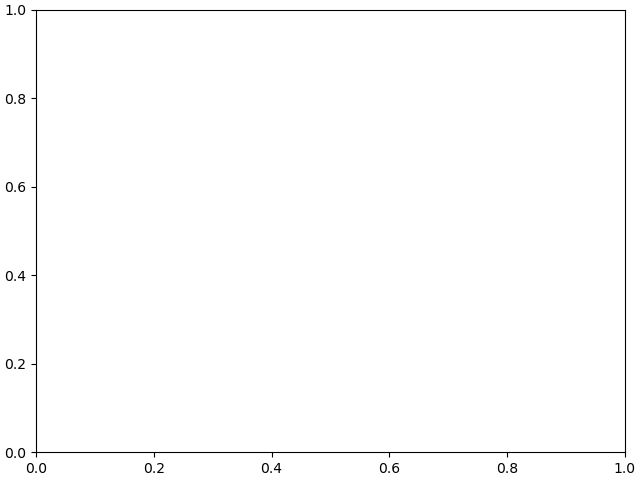

In [340]:
fig,ax = plt.subplots(constrained_layout=True)

x=ds_dropped.tot_scat.values
y=ds_dropped.d1.values
ax.scatter(x,y)
ax.set(xlabel='total scattering', ylabel='diode 1',xlim=(0,65),ylim=(0,200000))

In [341]:
# bin by delay
nd=10 #number of delay bins
binned=ds_dropped.groupby_bins('delay',nd).mean()#.mean(dim='run')

In [342]:
#normalize averages by average shot intensity
binned=binned.assign({'I_n':binned.I/binned.tot_scat})

In [343]:
# unit='q_A^-1'
yl=r'$ I(q)$'
xl=r'$q\quad \left[\mathrm{\AA^{-1}}\right]$'

In [344]:
binned.delay

<xarray.DataArray 'delay' (delay_bins: 10)>
array([0.32930825, 0.6047249 , 0.85961886, 1.11197308, 1.36321214,
       1.61889579, 1.87327352, 2.12944527, 2.37855577, 2.64907002])
Coordinates:
  * delay_bins  (delay_bins) object (0.223, 0.479] ... (2.507, 2.761]

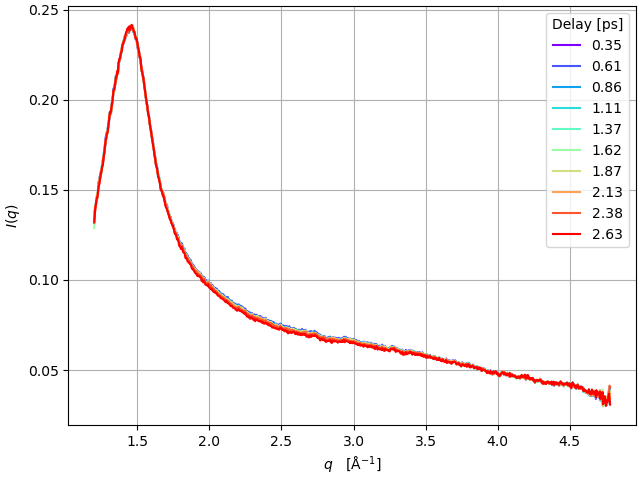

In [345]:
# N=binned.delay_bins.size
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.rainbow(np.linspace(0,1,nd)))

fig,ax=plt.subplots(constrained_layout=True)

t0 = binned.I_n[0]
for subarr in binned.I_n:
    x=subarr.q#[i.item().mid for i in subarr.q]
    y= subarr#-t0#)#/t0#/subarr.max()
    ax.plot(x,y,label=np.round(subarr.delay_bins.item().mid,2))
#     ax.plot(x,normed,label=subarr.delay_bins.item().mid)
ax.set(xlabel=xl,ylabel=yl)
ax.grid()
ax.legend(title='Delay [ps]')#,loc='lower center')#,ncol=4)